# Batch dispersion analysis

## Notebook init

In [1]:
%run src_ipynb/init.ipynb

Saved updated sensor names and dumped into /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/sensorNames.json


## Data Load

### Normal data load

In [2]:
%run src_ipynb/load_data.ipynb

HTML(value='<h2>Test load</h2>')

interactive(children=(SelectMultiple(description='Test', layout=Layout(width='600px'), options={'2017-06_INT_F…

HTML(value='<hr>')

Output()

### Manual data load

In [ ]:
# Load tests manually

from os.path import join
import os
import pandas as pd

folder = '/Deployments/KITS/05_6_pack/'

name_reading = 'DISPERSION'

for root, dirs, files in os.walk(folder):
    print 'Loading files in', folder
    for _file in files:
        if _file.endswith(".CSV") or _file.endswith(".csv"):
            print _file
            name = _file[:_file.find('.')]
            dataframe = pd.read_csv(join(folder, _file), skiprows=range(1,4)).set_index('Time')
            dataframe.index = pd.to_datetime(dataframe.index).tz_localize('UTC').tz_convert('Europe/Madrid')
            dataframe.index.rename('Time', inplace = True)
            dataframe.index.strftime('%Y-%m-%dT%H%M%SZ')
            dataframe.sort_index(inplace=True)
            
            # Remove duplicates from index
            dataframe = dataframe[~dataframe.index.duplicated(keep='first')]
            
            dataframe = dataframe.apply(pd.to_numeric,errors='coerce')     
            dataframe.fillna(0)
            
            records.readings[name_reading]['devices'][name] = dict()
            records.readings[name_reading]['devices'][name]['data'] = dataframe

## Input options

In [3]:
import pandas as pd
from os.path import dirname, join, abspath
from os import getcwd, pardir

# INPUT DATA
dispersion_test = 'BRISTOL'
rootDirectory = abspath(abspath(join(getcwd(), pardir)))
save_path = join(rootDirectory, 'data/export/figs')
type_file = 'png' # 'png' or 'fig' or 'nada'
limit = 10 # number_of_measurements/limit to be considered NG sensor
min_date = None
max_date = None
# ----------   

## Get list of common channels

In [4]:
# Get list of common channels

from os import getcwd, walk
from os.path import join
import pandas as pd

# List Readings list
print (records.readings[dispersion_test]['devices'].keys())
            
list_channels = list()
# Get list of devices
list_devices = list(records.readings[dispersion_test]['devices'].keys())
# Init list of common channels
list_channels = records.readings[dispersion_test]['devices'][list_devices[0]]['data'].columns
# Extract list of common channels

for device in records.readings[dispersion_test]['devices']:
    list_channels = list(set(list_channels) & set(records.readings[dispersion_test]['devices'][device]['data'].columns))
    print ('Device {}'.format(device))
    print ('Min reading at {}'.format(records.readings[dispersion_test]['devices'][device]['data'].index[0]))
    print ('Max reading at {}'.format(records.readings[dispersion_test]['devices'][device]['data'].index[-1]))
    # print(list_channels)         

print(list_channels)

if min_date != None: min_date = min_date.tz_localize('UTC').tz_convert('Europe/Madrid')
if max_date != None: max_date = max_date.tz_localize('UTC').tz_convert('Europe/Madrid')

dict_keys(['9742', '9743', '9744', '9745', '9746', '9747', '9748', '9749', '9750', '9751', '9811', '9812', '9813', '9814', '9815', '9816', '9817', '9818', '9819', '9820', '9821'])
Device 9742
Min reading at 2019-07-12 11:19:00+02:00
Max reading at 2019-07-12 14:18:00+02:00
Device 9743
Min reading at 2019-07-12 11:18:00+02:00
Max reading at 2019-07-12 14:19:00+02:00
Device 9744
Min reading at 2019-07-12 11:19:00+02:00
Max reading at 2019-07-12 14:18:00+02:00
Device 9745
Min reading at 2019-07-12 11:20:00+02:00
Max reading at 2019-07-12 14:19:00+02:00
Device 9746
Min reading at 2019-07-12 11:19:00+02:00
Max reading at 2019-07-12 14:19:00+02:00
Device 9747
Min reading at 2019-07-12 11:18:00+02:00
Max reading at 2019-07-12 14:19:00+02:00
Device 9748
Min reading at 2019-07-12 11:18:00+02:00
Max reading at 2019-07-15 11:37:00+02:00
Device 9749
Min reading at 2019-07-12 11:18:00+02:00
Max reading at 2019-07-12 14:20:00+02:00
Device 9750
Min reading at 2019-07-12 11:18:00+02:00
Max reading at 

## Dispersion analysis

### Dataset analysis

In [5]:
# Calculate the dispersion for the sensors present in the dataset
dispersion_df = pd.DataFrame()
dispersion_history = list()

print ('SENSOR DISPERSION')
for channel in list_channels:
    list_columns = list()
    for device in list_devices:
        
        dispersion_df[channel + '-' + device] = records.readings[dispersion_test]['devices'][device]['data'].loc[:,channel].astype('float64')
        list_columns.append(channel + '-' + device)
        # Trim dataset to min and max dates (normally these tests are carried out with _minutes_ of differences)
        if min_date != None: dispersion_df = dispersion_df[dispersion_df.index > min_date]
        if max_date != None: dispersion_df = dispersion_df[dispersion_df.index < max_date]
    
    # Calculate Metrics
    dispersion_df[channel + '_STD'] = dispersion_df.loc[:,list_columns].std(skipna=True, axis = 1)
    dispersion_global = dispersion_df[channel + '_STD'].mean()
    print (dispersion_df.index[0], dispersion_df.index[-1], channel, dispersion_global)
    dispersion_history.append([channel, dispersion_global, 1.5])

dispersion_history = tuple(dispersion_history)

SENSOR DISPERSION
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 CCS811_ECO2 416.5737478934143
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 TEMP 0.7538747671372212
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 PRESS 0.04240923136659623
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 BATT 17.976545928442093
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 CCS811_VOCS 95.17628017852816
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 HUM 2.1117240472425087
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 EXT_PM_10 2.184724157432033
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 NOISE_A 2.551547484281746
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 EXT_PM_1 1.4945313253676835
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 EXT_PM_25 1.8792001252587114
2019-07-12 11:19:00+02:00 2019-07-12 14:18:00+02:00 LIGHT 23.91532474797034


### Historic data 
For low amount of kits (<15)

In [ ]:
## Channel, dev, sigma
dispersion_history = (['NOISE_A', 1.4985941320690142, 3],
                      ['TEMP', 0.402864267636, 3],
                      ['HUM', 1.093261343673646, 3],
                      ['PM_1', 1.0993547541085011, 3],
                      ['PM_10', 1.8032029938488807, 3],
                      ['PM_25', 1.5317464142148285, 3],                      
                      ['EXT_PM_1', 1.0993547541085011, 3],
                      ['EXT_PM_10', 1.8032029938488807, 3],
                      ['EXT_PM_25', 1.5317464142148285, 3],
                      ['PRESS', 0.09164764646778648, 3],
                      ['LIGHT', 4.296821068348175, 3],
                      ['CCS811_VOCS', 2.4695145652624584, 3],
                      ['CCS811_ECO2', 18.211133488940373, 3])

In [ ]:
for device in list_devices:
    print ('Device {} number of points {}'.format(device, len(records.readings[dispersion_test]['devices'][device]['data'].index)))
    if (len(records.readings[dispersion_test]['devices'][device]['data'].index) == 0):
        records.readings[dispersion_test]['devices'].pop(device)

# Extract faulty devices

Min - Max Date
None None
['CCS811_ECO2', 'TEMP', 'PRESS', 'CCS811_VOCS', 'HUM', 'EXT_PM_10', 'NOISE_A', 'EXT_PM_1', 'EXT_PM_25', 'LIGHT']


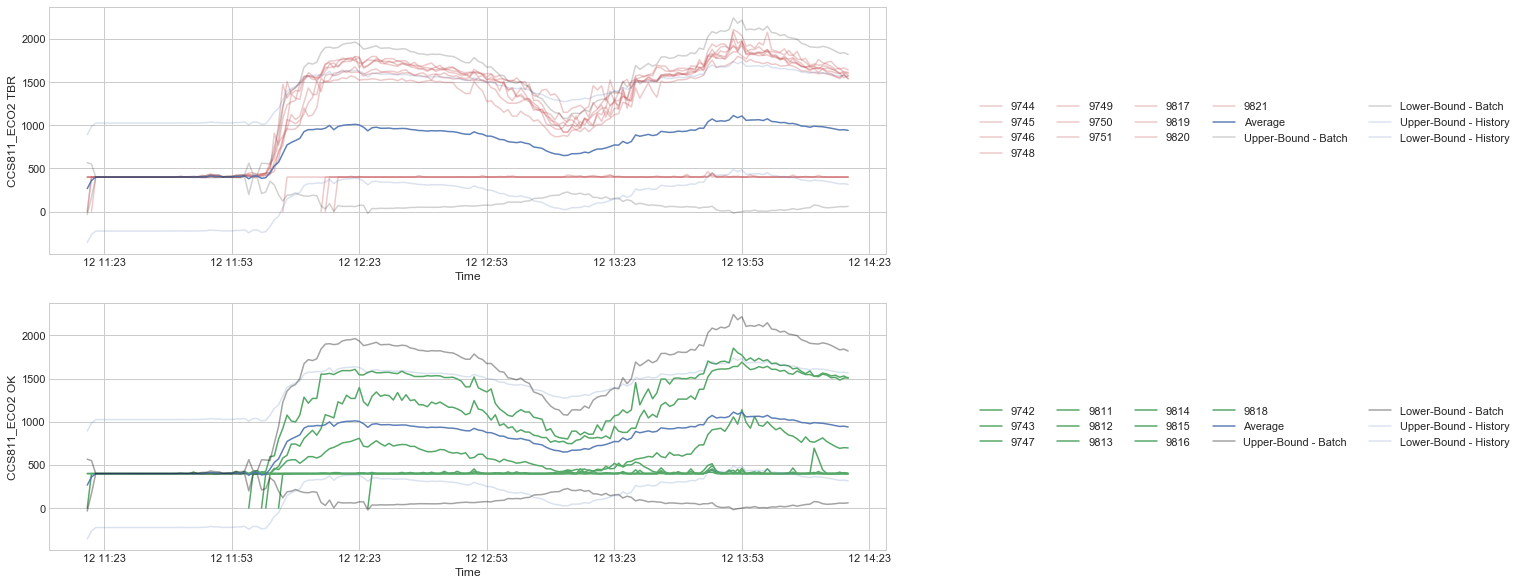

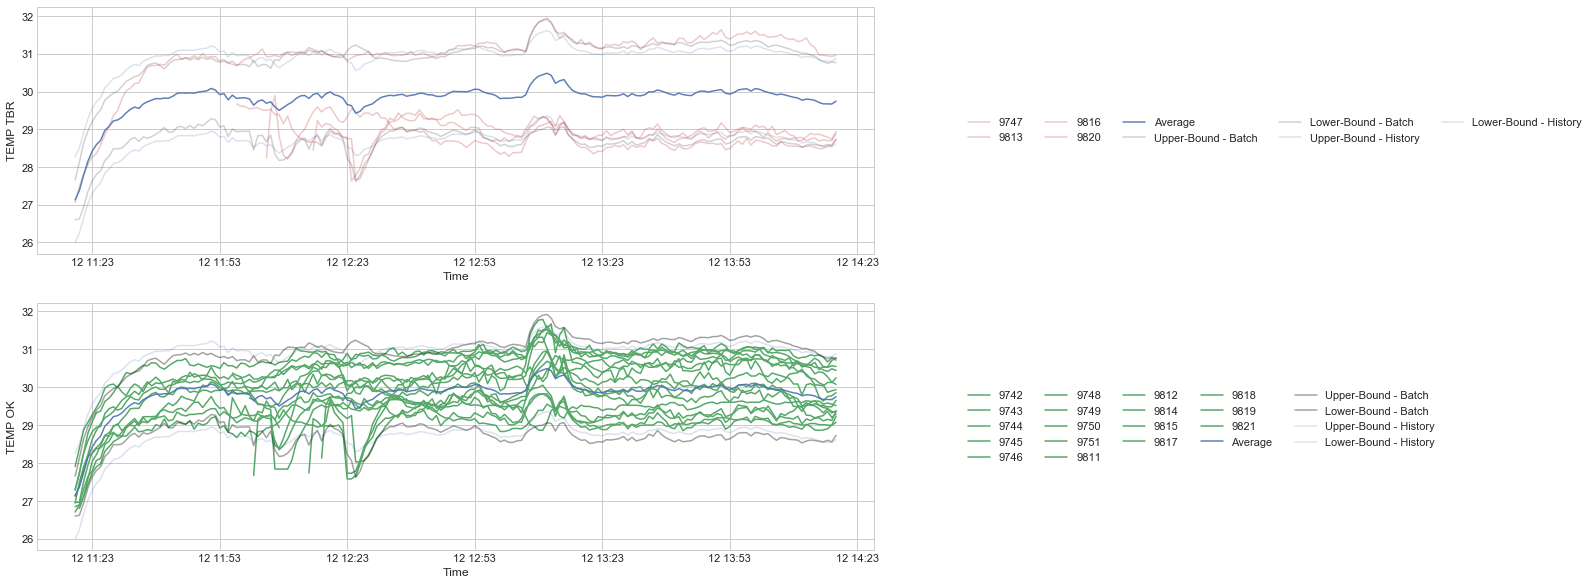

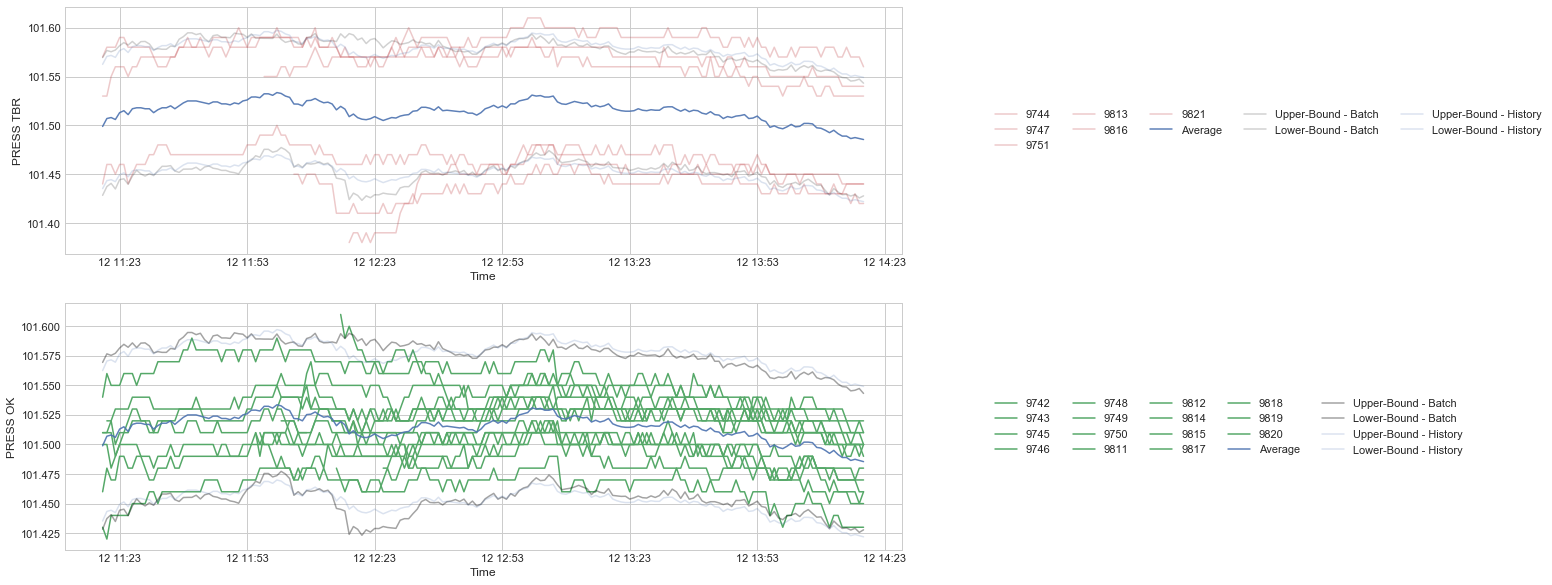

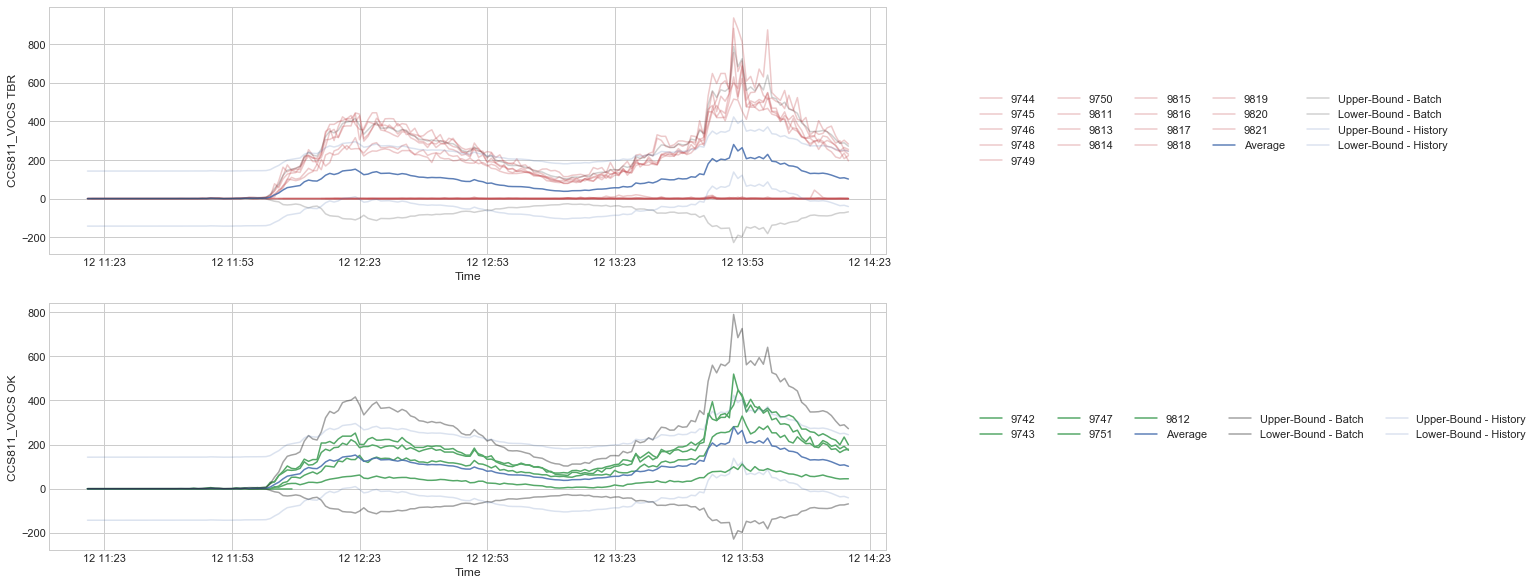

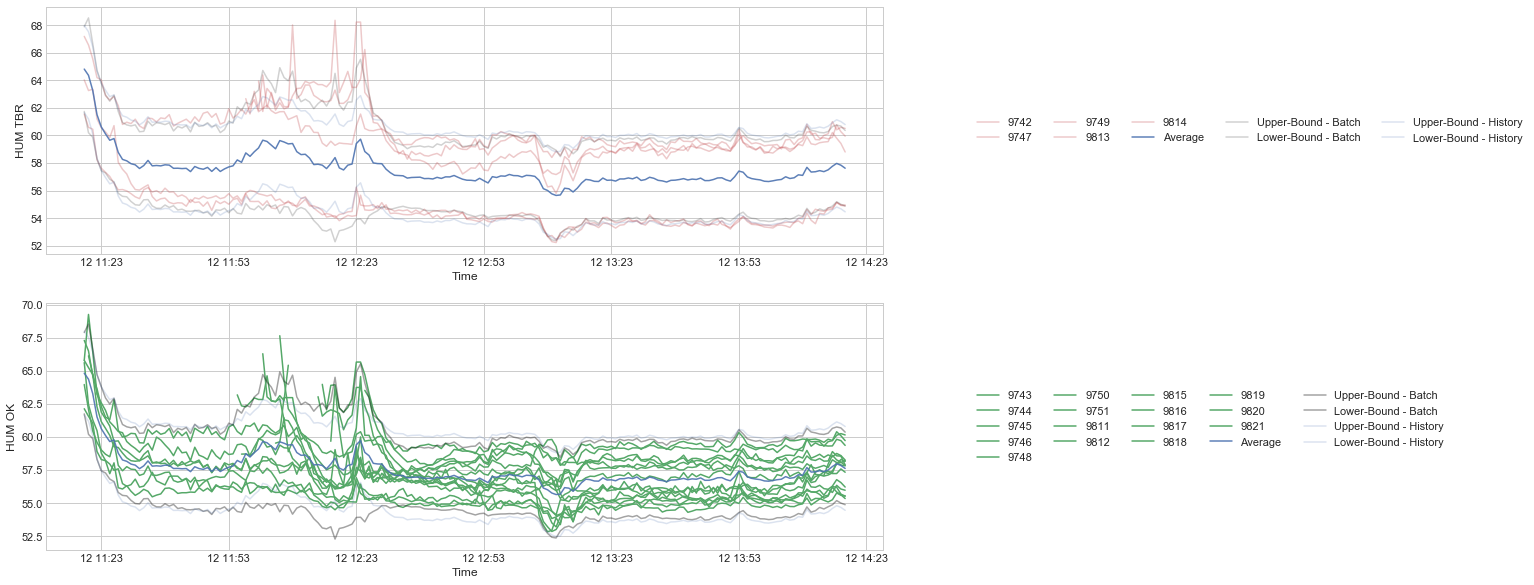

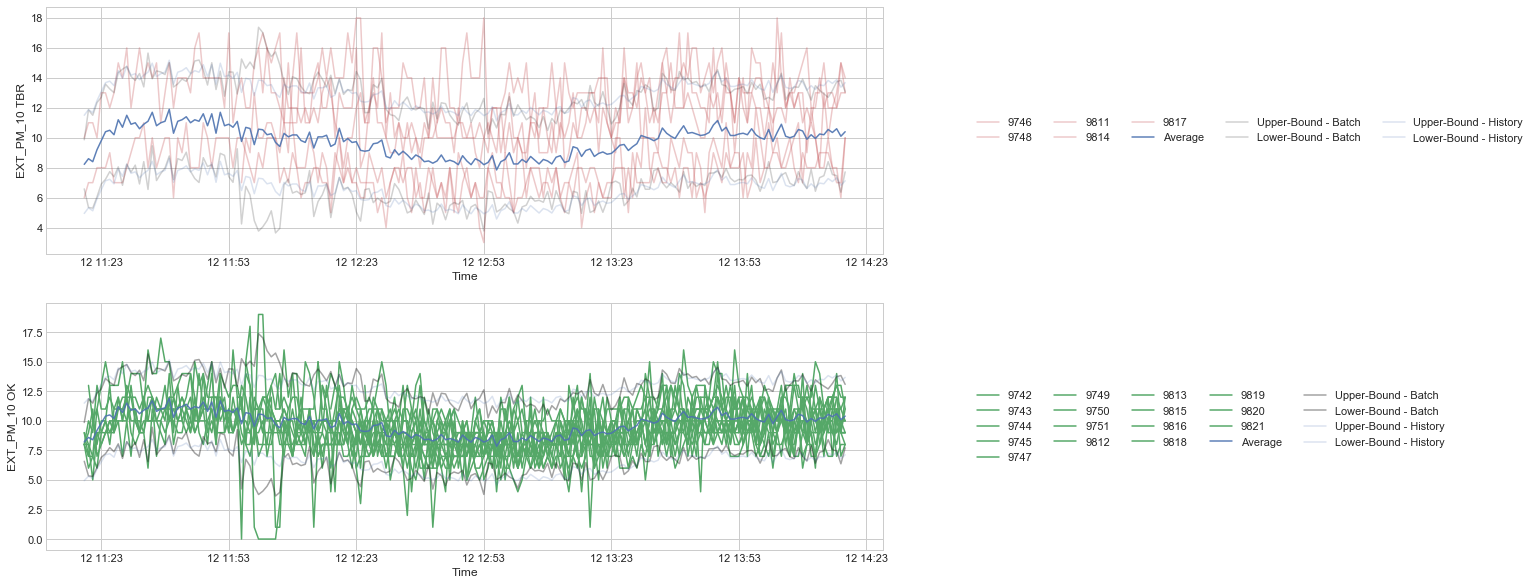

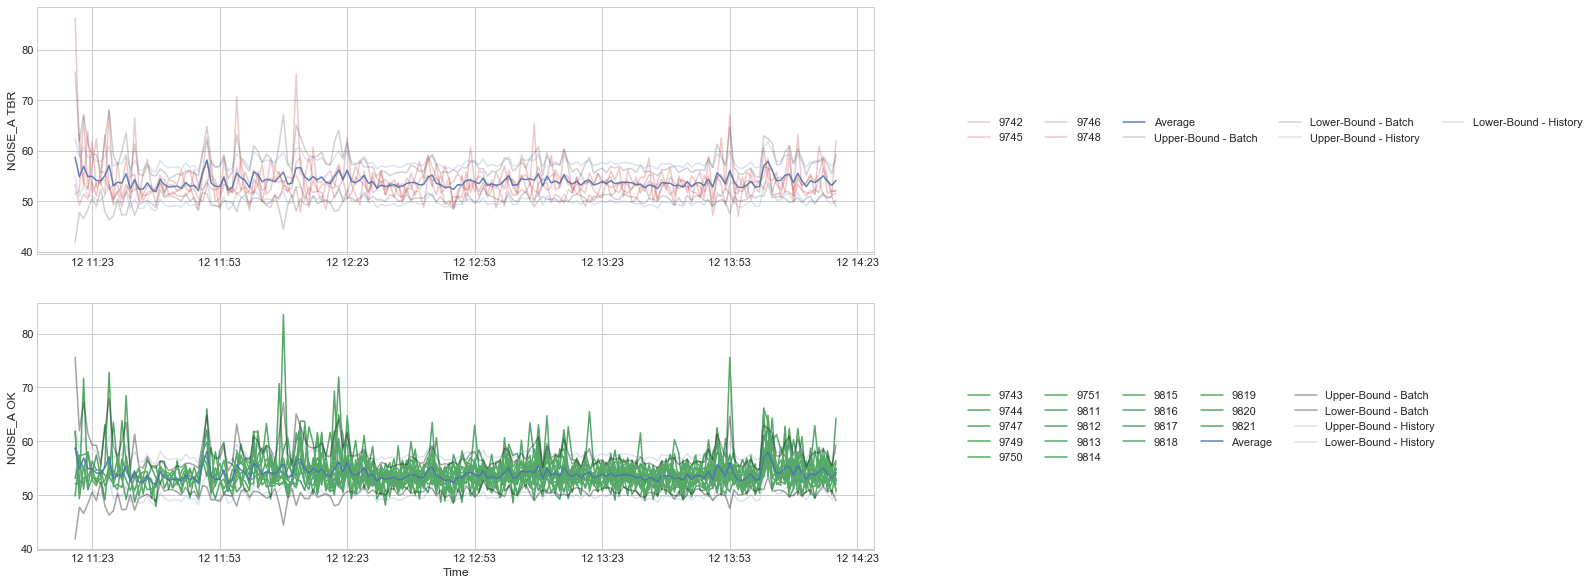

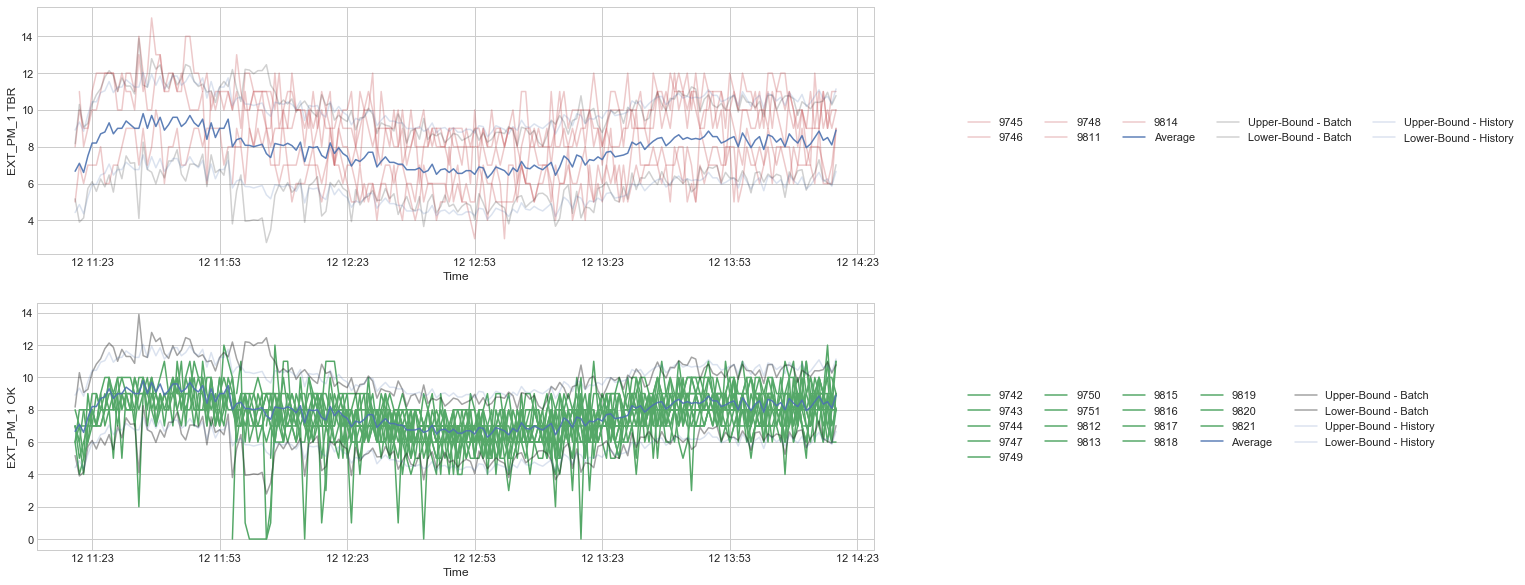

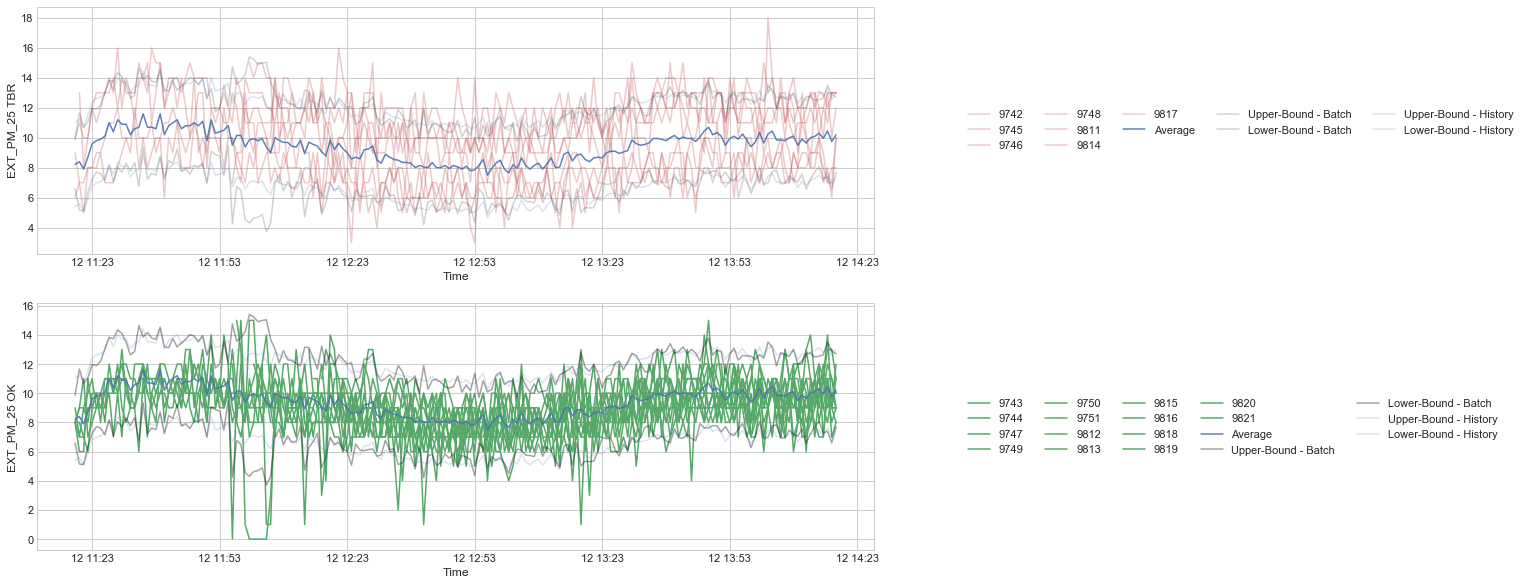

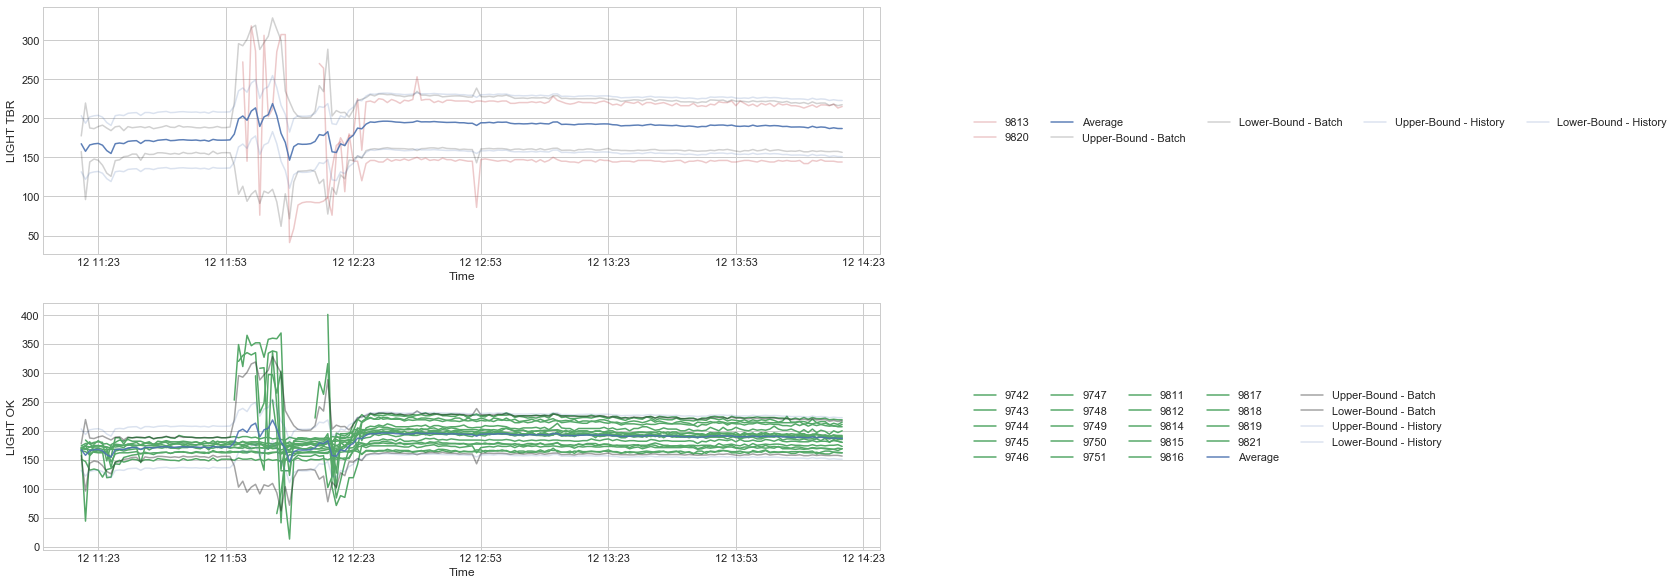

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import pickle

# Get list of devices
list_channels = list()
list_devices = list(records.readings[dispersion_test]['devices'].keys())

# Init list of common channels
list_channels = records.readings[dispersion_test]['devices'][list_devices[0]]['data'].columns

# Extract list of common channels
for device in records.readings[dispersion_test]['devices']:
    list_channels = list(set(list_channels) & set(records.readings[dispersion_test]['devices'][device]['data'].columns))
    #min_date = max(records.readings[dispersion_test]['devices'][device]['data'].index[0], min_date)
    #max_date = min(records.readings[dispersion_test]['devices'][device]['data'].index[-1], max_date)

print ('Min - Max Date')
print (min_date, max_date)
if 'BATT' in list_channels: list_channels.remove('BATT')
# if 'LIGHT' in list_channels: list_channels.remove('LIGHT')

print(list_channels)

dispersion_df = pd.DataFrame()

for channel in list_channels:
    list_columns = list()
    fig, (ax1, ax2) = plot.subplots(nrows = 2, figsize= (15,10))
    for device in list_devices:
        # Important to resample and bfill for unmatching measures
        dispersion_df[channel + '-' + device] = records.readings[dispersion_test]['devices'][device]['data'][channel].resample('1Min').bfill()
        list_columns.append(channel + '-' + device)
    
    
    # Trim dataset to min and max dates (normally these tests are carried out with _minutes_ of differences)
    if min_date != None: dispersion_df = dispersion_df[dispersion_df.index > min_date]
    if max_date != None: dispersion_df = dispersion_df[dispersion_df.index < max_date]
    
    # Calculate Metrics
    dispersion_df[channel + '_AVG'] = dispersion_df.loc[:,list_columns].mean(skipna=True, axis = 1)
    dispersion_df[channel + '_STD'] = dispersion_df.loc[:,list_columns].std(skipna=True, axis = 1)
    
    dispersion_global = 0
    limit_confidence_sigma = 0
    for item in dispersion_history:
        if channel == item[0]:
            dispersion_global = item[1]
            limit_confidence_sigma = item[2]
    
    dispersion_df[channel + '_MAX'] = dispersion_df.loc[:,list_columns].max(skipna=True, axis = 1)
    dispersion_df[channel + '_MIN'] = dispersion_df.loc[:,list_columns].min(skipna=True, axis = 1)
    
    upper_bound = dispersion_df[channel + '_AVG'] + limit_confidence_sigma*dispersion_df[channel + '_STD']
    lower_bound = dispersion_df[channel + '_AVG'] - limit_confidence_sigma*dispersion_df[channel + '_STD']
    
    upper_bound2 = dispersion_df[channel + '_AVG'] + limit_confidence_sigma*dispersion_global
    lower_bound2 = dispersion_df[channel + '_AVG'] - limit_confidence_sigma*dispersion_global
        
    for device in list_devices:
        count_problems_up = dispersion_df[channel + '-' + device] > upper_bound2
        count_problems_down =  dispersion_df[channel + '-' + device] < lower_bound2
        count_problems = [1 if (count_problems_up[i] or count_problems_down[i]) else 0 for i in range(len(count_problems_up))]
        # print (channel, device, np.sum(count_problems), len(count_problems))
        if np.sum(count_problems) > len(count_problems)/limit:
        #if any(dispersion_df[channel + '-' + device] > upper_bound2) or any(dispersion_df[channel + '-' + device] < lower_bound2):
            alpha = 0.3
            color = 'r'
            ax1.plot(dispersion_df.index, dispersion_df[channel + '-' + device], color = color, label = device, alpha = alpha)

        else:
            alpha = 1
            color = 'g'
            ax2.plot(dispersion_df.index, dispersion_df[channel + '-' + device], color = color, label = device, alpha = alpha)

    ax1.plot(dispersion_df.index, dispersion_df[channel + '_AVG'],'b', label = 'Average', alpha = 0.9)
    ax1.plot(dispersion_df.index, upper_bound, 'k', label = 'Upper-Bound - Batch', alpha = 0.2)
    ax1.plot(dispersion_df.index, lower_bound, 'k',label = 'Lower-Bound - Batch', alpha = 0.2)
    
    ax1.plot(dispersion_df.index, upper_bound2, 'b', label = 'Upper-Bound - History', alpha = 0.2)
    ax1.plot(dispersion_df.index, lower_bound2, 'b',label = 'Lower-Bound - History', alpha = 0.2)
    lgd1 = ax1.legend(bbox_to_anchor=(1.1, 0.5), fancybox=True, loc='center left', ncol = 5)
    ax1.grid(True)
    ax1.set_ylabel(channel + ' TBR')
    ax1.set_xlabel('Time')
    
    ax2.plot(dispersion_df.index, dispersion_df[channel + '_AVG'],'b', label = 'Average', alpha = 0.9)
    ax2.plot(dispersion_df.index, upper_bound, 'k', label = 'Upper-Bound - Batch', alpha = 0.4)
    ax2.plot(dispersion_df.index, lower_bound, 'k',label = 'Lower-Bound - Batch', alpha = 0.4)

    ax2.plot(dispersion_df.index, upper_bound2, 'b', label = 'Upper-Bound - History', alpha = 0.2)
    ax2.plot(dispersion_df.index, lower_bound2, 'b',label = 'Lower-Bound - History', alpha = 0.2)
    ax2.legend(bbox_to_anchor=(1.1, 0.5), fancybox=True, loc='center left', ncol = 5)
    lgd2 = ax2.legend(bbox_to_anchor=(1.1, 0.5), fancybox=True, loc='center left', ncol = 5)
    ax2.grid(True)
    ax2.set_ylabel(channel + ' OK')
    ax2.set_xlabel('Time')
    
    if type_file == 'fig':
        pickle.dump(fig, open(save_path + '/' + dispersion_test + '_' + channel + '.fig.pickle', 'wb'))
    elif type_file == 'png':
        fig.savefig(save_path + '/' + dispersion_test + '_' + channel + '.png', dpi=300, trasnparent = True, bbox_extra_artists=(lgd1, lgd2), bbox_inches='tight' )
        
plot.show()